In [ ]:
!pip install pygad

In [5]:
import pygad
import numpy
from numpy.linalg import norm
import matplotlib.pyplot as plt
import random
from typing import List
%matplotlib inline

In [220]:
POPULATION_SIZE = 100
GENERATIONS_NUM = 1000

ЛОР:
Есть бомба, точнее 100 идентичных копий, которые взорвутся через 1000 минут. Также есть очень много сапёров, которые очень хотят обезвредить бомбу. Каждый сапёр стоит в одной из 100 очередей. В каждой очереди первый сапёр пытается обезвредить бомбу. У него есть 1 минута на решение. Это очень мало, поэтому все сапёры заранее написали на листке свою догадку. Каждый набирает комбинацию на бомбе и нажимает на кнопку проверки. Если решение верное, то все спасены и бомбы не взорвутся. Если решение неверное, то сапёр погибает от очень высокого напряжения на кнопке, которое никак нельзя удалить/защититься от него. Все последующие сапёры получают следующую информацию, на основании которой они корректируют своё решение: сумму баллов и решение предыдущего сапёра. Сумма баллов считается так: +2 за правильную кнопку в 1 модуле, +4 за правильный провод во втором, +1 за правильную нажатую кнопку в 3 модуле, -1 за неправильную нажатую и -0.5 за неправильные ненажатые кнопки. 


модули бомбы:
1 модуль: 4 кнопки, надо нажать их по порядку

2 модуль: 3 провода, надо перерезать один.

3 модуль: 8 кнопок, надо какие-то кнопки нажать одновременно

In [208]:
def create_gene():
    Module1 = list(range(4))
    Module2 = [random.randint(0, 3)]
    Module3 = random.choices([0, 1], k=8)
    random.shuffle(Module1)
    gene = Module1 + Module2 + Module3
    return gene

In [221]:
# создание бомбы и популяции сапёров
random.seed(1)  # 81
bomb = create_gene()
init_pop = [numpy.array(create_gene()) for _ in range(POPULATION_SIZE)]
print(bomb)

[2, 1, 0, 3, 1, 1, 1, 0, 0, 1, 0, 0, 0]


In [222]:
def crossover_func(parents, offspring_size, ga_instance):
    offspring = parents[0].copy() # копия мамы
    offspring[4] = parents[1][4]  # от папы номер провода и порядок кнопок
    offspring[0:4] = parents[1][0:4]
    offspring[9:] = parents[1][9:]  # ну и немного нажатых
    return offspring

def mutation_func(offspring, ga_instance):
    decision = random.randint(0, 3)
    buttons_not_pressed = 8 - sum(offspring[5:])
    if decision:  # отжимаем/ничего не делаем
        offspring[random.randint(5, 5 + buttons_not_pressed)] = 0
    elif buttons_not_pressed:  # нажимаем кнопку
        offspring[random.randint(5, 5 + buttons_not_pressed)] = 1

    if decision:  # меняем местами порядок нажатия
        a, b = random.randint(0, 3), random.randint(0, 3)
        offspring[a], offspring[b] = offspring[b], offspring[a]
    
    decision = random.randint(0, 5)
    if decision == 3:  # режем другой провод
        offspring[4] = random.randint(0, 3)
    return offspring

def fitness_func(solution, solution_idx):
    result = 0
    for i in range(4):
        if solution[i] == bomb[i]:
            result += 2
        else:
            break
    for i in range(8):
        if solution[5 + i] == bomb[5 + i]:
            result += 1
        elif solution[5 + i] != bomb[5 + i] and solution[5 + i] != 0:
            result -= 1
        else:
            result -= 0.5

    if solution[4] == bomb[4]:
        result += 4
    return result

In [223]:
ga_instance = pygad.GA(
    num_generations=GENERATIONS_NUM,
    num_parents_mating=2,
    sol_per_pop=POPULATION_SIZE,
    gene_type=int,
    initial_population=init_pop,
    fitness_func=fitness_func,
    crossover_type=crossover_func,
    mutation_type=mutation_func
)

In [224]:
ga_instance.run()

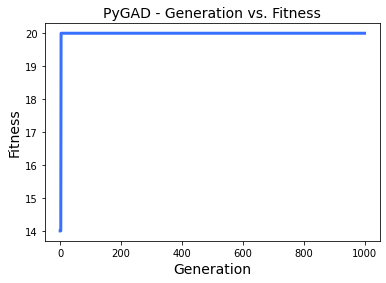

Бомбу смогли обезвредить
Решение лучшего сапёра : [2 1 0 3 1 1 1 0 0 1 0 0 0]
Параметры бомбы: [2, 1, 0, 3, 1, 1, 1, 0, 0, 1, 0, 0, 0]
Наибольшее количество баллов = 20.0


In [227]:
ga_instance.plot_fitness()

solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)

if solution_fitness == 20:
    print("Бомбу смогли обезвредить")
else:
    print("Все умерли...")

print("Решение лучшего сапёра : {solution}".format(solution=solution))
print("Параметры бомбы: {bomb}".format(bomb=bomb))
print("Наибольшее количество баллов = {solution_fitness}".format(solution_fitness=solution_fitness))